# Prediction based on All India Quota Under Graduate Allotment -2017

In [1]:
#importing various libraries needed for our model

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import re
import matplotlib.pyplot as plt

In [2]:
ls

notebook.ipynb  round_1_alloted.csv  Untitled Folder/
README.md       round_1_alloted.pdf


In [3]:
# read csv

data = pd.read_csv('round_1_alloted.csv',header=None)

In [4]:
data = data.set_index(0)
#print(data)

In [5]:
data.head()


,1,2,3,4,5,6
0,,,,,,
1,1,"MAULANA AZAD MEDICAL COLLEGE, NEW\rDELHI",MBBS,UR,UR,Allotted
2,4,"BANGALORE MED. COLLEGE,BANGALORE",MBBS,UR,UR,Allotted
3,7,"MAULANA AZAD MEDICAL COLLEGE, NEW\rDELHI",MBBS,UR,UR,Allotted
4,8,"MAULANA AZAD MEDICAL COLLEGE, NEW\rDELHI",MBBS,UR,UR,Allotted
5,10,"MAULANA AZAD MEDICAL COLLEGE, NEW\rDELHI",MBBS,UR,UR,Allotted


In [6]:
categories = ['UR', 'OBC', 'SC']
for idx,row in data.iterrows():
    for category in categories:
        if f'{category} PH' in row[5]:
            data[5][idx] = f'{category} PH'
    
    
    if 'UR PH' in row[5]:
        data[5][idx] = 'UR PH'
    if 'OBC PH' in row[5] :
        data[5][idx] = 'OBC PH'
    if(row[5] == 'SC PH1'):
        data[5][idx] = 'SC PH'
    if(row[5] == 'OBC PH2'):
        data[5][idx] = 'OBC PH'
    if(row[5] == 'SC PH2'):
        data[5][idx] = 'SC PH'
    if(row[5] == 'ST PH1' or row[5] == 'ST PH2'):
        data[5][idx] = 'ST PH'

/home/kunal_goyal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/kunal_goyal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/kunal_goyal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/ku

In [7]:
# drop 6th coloumn as it only has 'Allotted' value.

data = data.drop(6,axis=1)

In [8]:
# dictionary to map college to integer value

from collections import defaultdict
clg_to_int = defaultdict(str)
idx = 0
for i in data[2]:
    if(i not in clg_to_int):
        clg_to_int[i] = idx
        idx+=1

In [9]:
#clg_to_int
#int_to_clg
# there are 217 colleges from 0 to 216 :-)
data.head()

,1,2,3,4,5
0,,,,,
1,1,"MAULANA AZAD MEDICAL COLLEGE, NEW\rDELHI",MBBS,UR,UR
2,4,"BANGALORE MED. COLLEGE,BANGALORE",MBBS,UR,UR
3,7,"MAULANA AZAD MEDICAL COLLEGE, NEW\rDELHI",MBBS,UR,UR
4,8,"MAULANA AZAD MEDICAL COLLEGE, NEW\rDELHI",MBBS,UR,UR
5,10,"MAULANA AZAD MEDICAL COLLEGE, NEW\rDELHI",MBBS,UR,UR


In [10]:
# map int to college through previous clg_to_int mapping

int_to_clg = ['str']*218
for value in clg_to_int:
    #print(value)
    int_to_clg[clg_to_int[value]] = value

In [11]:
for i in range(len(int_to_clg)):
  int_to_clg[i]=re.sub('\r',' ',int_to_clg[i])
  int_to_clg[i]=re.sub('\n',' ',int_to_clg[i])

In [12]:
# add extra coloumn to convert college name to previously mapped value

data[7] = pd.Series(np.random.randint(len(data)), index=data.index)

for i in range(len(data)):
    #print(datar)
    data.iloc[i,5]=int(clg_to_int[data.iloc[i,1]])
data.head()

,1,2,3,4,5,7
0,,,,,,
1,1,"MAULANA AZAD MEDICAL COLLEGE, NEW\rDELHI",MBBS,UR,UR,0
2,4,"BANGALORE MED. COLLEGE,BANGALORE",MBBS,UR,UR,1
3,7,"MAULANA AZAD MEDICAL COLLEGE, NEW\rDELHI",MBBS,UR,UR,0
4,8,"MAULANA AZAD MEDICAL COLLEGE, NEW\rDELHI",MBBS,UR,UR,0
5,10,"MAULANA AZAD MEDICAL COLLEGE, NEW\rDELHI",MBBS,UR,UR,0


In [13]:
# now we can drop college name 

data = data.drop(2,axis = 1)
data.head()

,1,3,4,5,7
0,,,,,
1,1,MBBS,UR,UR,0
2,4,MBBS,UR,UR,1
3,7,MBBS,UR,UR,0
4,8,MBBS,UR,UR,0
5,10,MBBS,UR,UR,0


'MAHARAJA K.C. GAJAPATI M.C.,BRAHMAPUR'

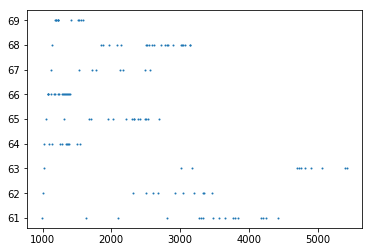

In [14]:
la = np.logical_and
urdata = data[la(la(data[4]=='UR',data[3]=='MBBS'),la(60 < data[7],data[7]<70))]
rank = urdata[1]
clgid = urdata[7]
plt.scatter(rank,clgid,s=1)
int_to_clg[55]

In [15]:
# partition X and Y 

X = data[[1,3,4,5]]
Y = data[7]
Y = pd.DataFrame(Y)

In [16]:
# creating category of X

category = [3,4,5]
for cat in category:
    dumm = pd.get_dummies(X[cat],prefix=cat)
    X = pd.concat([X,dumm],axis=1)
    X.drop(cat,axis=1,inplace = True)


In [17]:
# after category 
X.head()

,1,3_BDS,3_MBBS,4_OBC,4_OBC PH,4_SC,4_SC PH,4_ST,4_ST PH,4_UR,4_UR PH,5_OBC,5_OBC PH,5_SC,5_SC PH,5_ST,5_ST PH,5_UR,5_UR PH
0,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,7,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,8,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
5,10,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [18]:
Y.head()

,7
0,
1,0
2,1
3,0
4,0
5,0


In [19]:
# spliting X and Y in crossvalidation and traing set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [20]:
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4018, 19)
(4018, 1)
(3616, 19)
(402, 19)
(3616, 1)
(402, 1)


In [21]:
# decision tree model
dtree_model = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
#linear_model = LinearRegression().fit(X_train,y_train)
#svr_model = SVR().fit(X,Y)

In [22]:
# predicting values for crossvalidation 'y_test' set

y_pred = dtree_model.predict(X_test)
y_pred = pd.DataFrame(y_pred, index = y_test.index, columns=[7])
#y_pred_linear = pd.DataFrame(linear_model.predict(X_test),index=y_test.index,columns=[7])
#y_pred_svr = pd.DataFrame(svr_model.predict(X_test),index=y_test.index,columns=[7])
#y_pred.rename(columns = )
#y_test.iloc[7][7]

In [23]:
#y_pred_svr
data.head()

,1,3,4,5,7
0,,,,,
1,1,MBBS,UR,UR,0
2,4,MBBS,UR,UR,1
3,7,MBBS,UR,UR,0
4,8,MBBS,UR,UR,0
5,10,MBBS,UR,UR,0


In [24]:
# summ = 0
# for i in range (len(y_test)):
#     if(abs(y_pred.iloc[i][7]-y_test.iloc[i][7])<=3):
#         summ+=1
# summ

In [25]:
# now we can make prediction according to rank, Alloted_category, course, candidate category.
print('What is your rank?')
rank = int(input())

What is your rank?


In [26]:
print('Select the category which you want to be alloted(from options below)?')
print('1. UR \n2. UR PH\n3. OBC \n4. OBC PH\n5. SC\n6. SC PH\n7. ST\n8. ST PH')
alloted_cat = input()

Select the category which you want to be alloted(from options below)?
1. UR 
2. UR PH
3. OBC 
4. OBC PH
5. SC
6. SC PH
7. ST
8. ST PH


In [27]:
print('Select the category which you belong to (from options below)?')
print('1. UR \n2. UR PH\n3. OBC \n4. OBC PH\n5. SC\n6. SC PH\n7. ST\n8. ST PH')
candidate_cat = input()

Select the category which you belong to (from options below)?
1. UR 
2. UR PH
3. OBC 
4. OBC PH
5. SC
6. SC PH
7. ST
8. ST PH


In [28]:
print('Select the course which you wana to take from options below)?')
print('1. MBBS \n2. BDS')
course = input()

Select the course which you wana to take from options below)?
1. MBBS 
2. BDS


In [29]:
# if alloted_cat=='UR' or alloted_cat=='OBC'):
#     if course == 'MBBS':
#         if rank > 6000:
#             print('No college')
#     if course == 'BDS':
#         if rank>8400:
#             print('No college')

# if alloted_cat=='UR PH' or alloted_cat=='OBC PH':
#     if rank > 72000:
#         print('No college')
# if alloted_cat=='SC':
#     if course == 'MBBS':
#         if rank > 6000:
#             print('No college')
#     if course == 'BDS':
#         if rank>8400:
#             print('No college')

val = np.max(data[la(data[4]==alloted_cat,data[3]==course)][1])
val += val*0.1
if rank>val:
    print('Sorry, according to previous counsellings you are not eligible to get any college for All India NEET couselling')
    exit()

Sorry, according to previous counsellings you are not eligible to get any college for All India NEET couselling


In [30]:
clmns = ['3_BDS','3_MBBS','4_OBC','4_OBC PH','4_SC','4_SC PH','4_ST','4_ST PH','4_UR','4_UR PH','5_OBC','5_OBC PH','5_SC','5_SC PH','5_ST','5_ST PH','5_UR','5_UR PH']
test = pd.DataFrame({0:[1],1:[rank]})
for i in clmns:
  test[i] = pd.Series(np.random.randint(1))
test

,0,1,3_BDS,3_MBBS,4_OBC,4_OBC PH,4_SC,4_SC PH,4_ST,4_ST PH,4_UR,4_UR PH,5_OBC,5_OBC PH,5_SC,5_SC PH,5_ST,5_ST PH,5_UR,5_UR PH
0,1,60000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test = test.set_index(0)

In [ ]:
test['3_'+course] = 1
test['4_'+alloted_cat] = 1
test['5_'+candidate_cat] = 1
test

In [ ]:
dtree_model = DecisionTreeRegressor(random_state=42).fit(X, Y)

In [ ]:
ans = dtree_model.predict(test)


In [ ]:
print('Model predicted colleges:\n\n')

if int(ans[0])<3:
  for i in range(6):
    print(int_to_clg[i])
elif int(ans[0])>213:
  for i in range(211,216):
    print(int_to_clg[i])
else:
  for i in range(int(ans[0]),int(ans[0])+3):
    print(int_to_clg[i])
  for i in range(int(ans[0])-3,int(ans[0])):
    print(int_to_clg[i])
  